In [1]:
# In this project we will analyze two datasets. The first data set will be the results of political polls. We will analyze this aggregated poll data and answer some questions:

#1.) Who was being polled and what was their party affiliation?
#2.) Did the poll results favor Romney or Obama?
#3.) How do undecided voters effect the poll?
#4.) Can we account for the undecided voters?
#5.) How did voter sentiment change over time?
#6.) Can we see an effect in the polls from the debates?


In [2]:

import pandas as pd
from pandas import Series,DataFrame
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from __future__ import division

In [3]:
#The data for the polls will be obtained from HuffPost Pollster.

In [7]:
# To grab data from the web(HTTP capabilities)
import requests

# StringIO to work with the csv file, the DataFrame will require a .read() method
from io import StringIO

In [8]:
# This is the url link for the poll data in csv form
url = "http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv"

# Use requests to get the information in text form
source = requests.get(url).text

# Use StringIO to avoid an IO error with pandas
poll_data = StringIO(source) 

In [9]:
poll_df= pd.read_csv(poll_data)


poll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Pollster                586 non-null    object 
 1   Start Date              586 non-null    object 
 2   End Date                586 non-null    object 
 3   Entry Date/Time (ET)    586 non-null    object 
 4   Number of Observations  564 non-null    float64
 5   Population              586 non-null    object 
 6   Mode                    586 non-null    object 
 7   Obama                   586 non-null    float64
 8   Romney                  586 non-null    float64
 9   Undecided               423 non-null    float64
 10  Other                   202 non-null    float64
 11  Pollster URL            586 non-null    object 
 12  Source URL              584 non-null    object 
 13  Partisan                586 non-null    object 
 14  Affiliation             586 non-null    ob

In [10]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,https://elections.huffingtonpost.com/pollster/...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


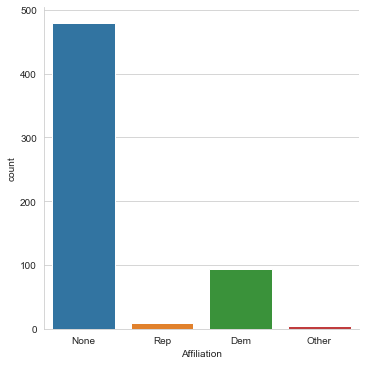

In [11]:
sns.catplot(x='Affiliation', data= poll_df,kind='count')

In [12]:
#Looks like we are overall relatively neutral, but still leaning towards Democratic Affiliation, it will be good to keep this in mind. Let's see if sorting by the Population hue gives us any further insight into the data.

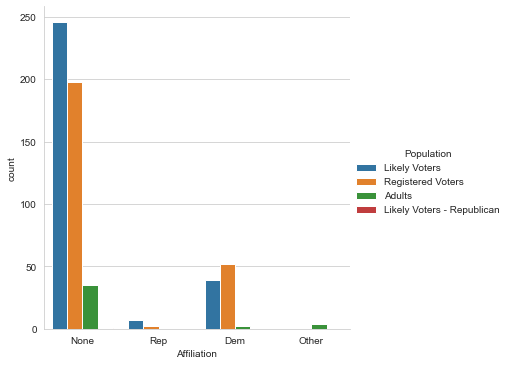

In [14]:
sns.catplot(x='Affiliation', data=poll_df,hue='Population', kind='count')

In [15]:
#Looks like we have a strong showing of likely voters and Registered Voters, so the poll data should hopefully be a good reflection on the populations polled

In [31]:
# Lets create a dataframe of average


avg= pd.DataFrame(poll_df.mean())


avg.drop('Number of Observations', axis=0, inplace= True)

avg.drop('Other',axis=0, inplace= True)

avg.drop('Question Text',axis=0, inplace= True)

avg.drop('Question Iteration',axis=0, inplace= True)

In [32]:
avg.head()

,0
Obama,46.805461
Romney,44.614334
Undecided,6.550827


In [29]:
std= pd.DataFrame(poll_df.std())

 
std.drop('Number of Observations',axis=0, inplace= True)

std.drop('Other',axis=0, inplace= True)

std.drop('Question Text',axis=0, inplace= True)

std.drop('Question Iteration',axis=0, inplace= True)

In [30]:
std.head()

,0
Obama,2.422058
Romney,2.906180
Undecided,3.701754


<AxesSubplot:>

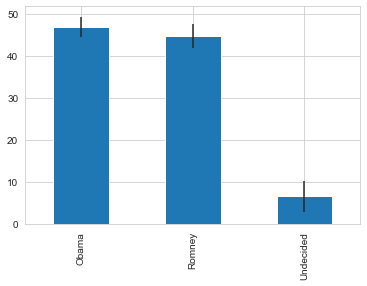

In [33]:
# now plot using pandas built-in plot, with kind='bar' and yerr='std'
avg.plot(yerr=std,kind='bar',legend=False)

In [21]:
#Interesting to see how close these polls seem to be, especially considering the undecided factor. Let's take a look at the numbers.

In [34]:
# Concatenate our Average and Std DataFrames
poll_avg = pd.concat([avg,std],axis=1)

poll_avg.columns = ['Average','STD']


poll_avg

,Average,STD
Obama,46.805461,2.422058
Romney,44.614334,2.906180
Undecided,6.550827,3.701754


In [35]:
#Looks like the polls indicate it as a fairly close race, but what about the undecided voters? Most of them will likely vote for one of the candidates once the election occurs. If we assume we split the undecided evenly between the two candidates the observed difference should be an unbiased estimate of the final difference.

In [36]:
#Lets take a look at our data

poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,https://elections.huffingtonpost.com/pollster/...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


<AxesSubplot:xlabel='End Date'>

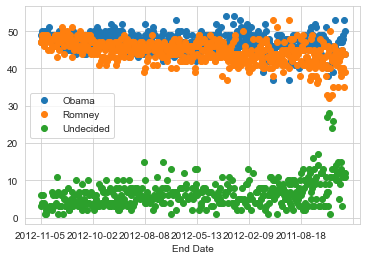

In [37]:
poll_df.plot(x='End Date', y=['Obama','Romney','Undecided'], linestyle='', marker='o')

In [38]:
#While this may give you a quick idea, go ahead and try creating a new DataFrame or editing poll_df to make a better visualization of the above idea!

In [39]:
#we'll go ahead and answer another question related to plotting the sentiment versus time. Let's go ahead and plot out the difference between Obama and Romney and how it changes as time moves along.

In [42]:
from datetime import datetime

# Create a new column for the difference between the two candidates
poll_df['Difference'] = (poll_df.Obama - poll_df.Romney)

poll_df.head()


,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration,Difference
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1,0.0
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1,2.0
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1,0.0
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,https://elections.huffingtonpost.com/pollster/...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1,1.0
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1,-1.0


In [49]:
poll_df= poll_df.groupby(['Start Date'], as_index= False).mean()  ## Set as_index=Flase to keep the 0,1,2,... index. Then we'll take the mean of the polls on that day.


poll_df.head()

,Start Date,Number of Observations,Obama,Romney,Undecided,Difference
0,2009-03-13,1403.0,44.0,44.0,12.0,0.0
1,2009-04-17,686.0,50.0,39.0,11.0,11.0
2,2009-05-14,1000.0,53.0,35.0,12.0,18.0
3,2009-06-12,638.0,48.0,40.0,12.0,8.0
4,2009-07-15,577.0,49.0,40.0,11.0,9.0


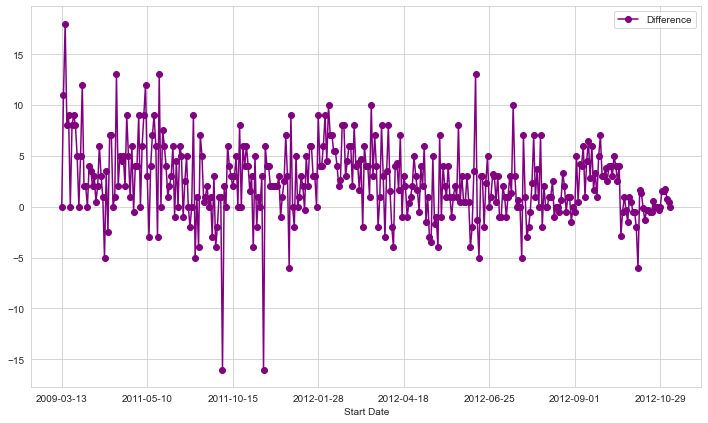

In [52]:
# Plotting the difference in polls between Obama and Romney
fig = poll_df.plot(x='Start Date',y='Difference',figsize=(12,7),marker='o',linestyle='-',color='purple')

In [53]:
#It would be very interesting to plot marker lines on the dates of the debates and see if there is any general insight to the poll results.

#The debate dates were Oct 3rd, Oct 11, and Oct 22nd. Let's plot some lines as markers and then zoom in on the month of October.

In [58]:
row_in = 0
xlimit = []

for date in poll_df['Start Date']:
    if date[0:7] == '2012-10':
        xlimit.append(row_in)
        row_in +=1
    else:
        row_in += 1
        
min(xlimit)

325

In [59]:
max(xlimit)

352

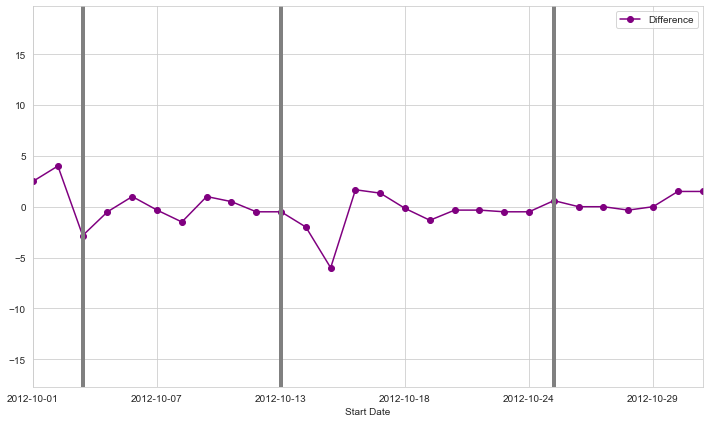

In [65]:
fig = poll_df.plot(x='Start Date',y='Difference',figsize=(12,7),marker='o',linestyle='-',color='purple', xlim=(325,352))

plt.axvline(x=325+2, linewidth=4, color='grey')
plt.axvline(x=325+10, linewidth=4, color='grey')
plt.axvline(x=325+21, linewidth=4, color='grey')

In [66]:
##Surprisingly, thse polls reflect a dip for Obama after the second debate against Romney, even though memory serves that he performed much worse against Romney during the first debate.

##For all these polls it is important to remeber how geographical location can effect the value of a poll in predicting the outcomes of a national election.

In [67]:
#Donor Data Set
#Let's go ahead and switch gears and take a look at a data set consisting of information on donations to the federal campaign.


#The questions we will be trying to answer while looking at this Data Set is:

#1.) How much was donated and what was the average donation?
##2.) How did the donations differ between candidates?
#3.) How did the donations differ between Democrats and Republicans?
#4.) What were the demographics of the donors?
#5.) Is there a pattern to donation amounts?

In [72]:
donor_df=pd.read_csv('Election_Donor_Data.csv', low_memory= False)


donor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cmte_id            1001731 non-null  object 
 1   cand_id            1001731 non-null  object 
 2   cand_nm            1001731 non-null  object 
 3   contbr_nm          1001731 non-null  object 
 4   contbr_city        1001712 non-null  object 
 5   contbr_st          1001727 non-null  object 
 6   contbr_zip         1001620 non-null  object 
 7   contbr_employer    988002 non-null   object 
 8   contbr_occupation  993301 non-null   object 
 9   contb_receipt_amt  1001731 non-null  float64
 10  contb_receipt_dt   1001731 non-null  object 
 11  receipt_desc       14166 non-null    object 
 12  memo_cd            92482 non-null    object 
 13  memo_text          97770 non-null    object 
 14  form_tp            1001731 non-null  object 
 15  file_num           1001731 non-n

In [73]:
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [77]:
donor_df['contb_receipt_amt'].value_counts()

 100.00     178188
 50.00      137584
 25.00      110345
 250.00      91182
 500.00      57984
             ...  
 58.43           1
-2115.21         1
 75.64           1
 142.41          1
 35.83           1
Name: contb_receipt_amt, Length: 8079, dtype: int64

In [83]:

don_mean = donor_df['contb_receipt_amt'].mean()


don_std = donor_df['contb_receipt_amt'].std()

don_mean

298.2351500951093

In [84]:
don_std

3749.666723269043

In [89]:
#Wow! That's a huge standard deviation! Let's see if there are any large donations or other factors messing with the distribution of the donations.

In [106]:
top_donor= donor_df['contb_receipt_amt'].copy()

top_donor.sort_values( inplace= True)

top_donor

114604     -30800.00
226986     -25800.00
101356      -7500.00
398429      -5500.00
250737      -5455.00
             ...    
319478     526246.17
344419    1511192.17
344539    1679114.65
326651    1944042.43
325136    2014490.51
Name: contb_receipt_amt, Length: 1001731, dtype: float64

In [107]:
#Looks like we have some negative values, as well as some huge donation amounts! The negative values are due to the FEC recording refunds as well as donations, let's go ahead and only look at the positive contribution amounts

In [108]:
# Get rid of the negative values
top_donor = top_donor[top_donor >0]


top_donor.sort_values(inplace=True)

# Look at the top 10 most common donations value counts
top_donor.value_counts().head(10)

100.0     178188
50.0      137584
25.0      110345
250.0      91182
500.0      57984
2500.0     49005
35.0       37237
1000.0     36494
10.0       33986
200.0      27813
Name: contb_receipt_amt, dtype: int64

In [109]:
#Here we can see that the top 10 most common donations ranged from 10 to 2500 dollars.

#A quick question we could verify is if donations are usually made in round number amounts? (e.g. 10,20,50,100,500 etc.) We can quickly visualize this by making a histogram and checking for peaks at those values. Let's go ahead and do this for the most common amounts, up to 2500 dollars.

<AxesSubplot:>

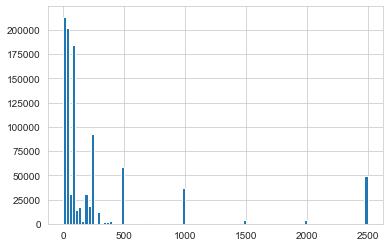

In [111]:
# Series of the common donations limited to 2500
com_don = top_donor[top_donor <= 2500]

# Set a high number of bins to account for the non-round donations and check histogram for spikes.
com_don.hist(bins=100)

In [112]:
#Looks like our intuition was right, since we spikes at the round numbers.

#Let's dive deeper into the data and see if we can seperate donations by Party, in order to do this we'll have to figure out a way of creating a new 'Party' column

In [124]:
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [125]:
# Grab the unique object from the candidate column
candidates = donor_df.cand_nm.unique()

candidates

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [126]:
party_map = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}


donor_df['Party'] = donor_df.cand_nm.map(party_map)

In [128]:
donor_df = donor_df[donor_df.contb_receipt_amt >0]  #to clear refunds

donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,Party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


In [129]:
#Let's start by aggregating the data by candidate. We'll take a quick look a the total amounts received by each candidate. First we will look a the total number of donations and then at the total amount.

In [130]:
donor_df.groupby('cand_nm')['contb_receipt_amt'].count()

cand_nm
Bachmann, Michelle                 13082
Cain, Herman                       20052
Gingrich, Newt                     46883
Huntsman, Jon                       4066
Johnson, Gary Earl                  1234
McCotter, Thaddeus G                  73
Obama, Barack                     589127
Paul, Ron                         143161
Pawlenty, Timothy                   3844
Perry, Rick                        12709
Roemer, Charles E. 'Buddy' III      5844
Romney, Mitt                      105155
Santorum, Rick                     46245
Name: contb_receipt_amt, dtype: int64

In [131]:
# Groupby candidate and then displayt the total amount donated
donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()

cand_nm
Bachmann, Michelle                2.711439e+06
Cain, Herman                      7.101082e+06
Gingrich, Newt                    1.283277e+07
Huntsman, Jon                     3.330373e+06
Johnson, Gary Earl                5.669616e+05
McCotter, Thaddeus G              3.903000e+04
Obama, Barack                     1.358774e+08
Paul, Ron                         2.100962e+07
Pawlenty, Timothy                 6.004819e+06
Perry, Rick                       2.030575e+07
Roemer, Charles E. 'Buddy' III    3.730099e+05
Romney, Mitt                      8.833591e+07
Santorum, Rick                    1.104316e+07
Name: contb_receipt_amt, dtype: float64

In [135]:
# Start by setting the groupby as an object
cand_amount = donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()

# Our index tracker
i = 0

for don in cand_amount:
    print (" The candidate %s raised %.0f dollars " %(cand_amount.index[i],don))
    print ('\n')
    i += 1

 The candidate Bachmann, Michelle raised 2711439 dollars 


 The candidate Cain, Herman raised 7101082 dollars 


 The candidate Gingrich, Newt raised 12832770 dollars 


 The candidate Huntsman, Jon raised 3330373 dollars 


 The candidate Johnson, Gary Earl raised 566962 dollars 


 The candidate McCotter, Thaddeus G raised 39030 dollars 


 The candidate Obama, Barack raised 135877427 dollars 


 The candidate Paul, Ron raised 21009620 dollars 


 The candidate Pawlenty, Timothy raised 6004819 dollars 


 The candidate Perry, Rick raised 20305754 dollars 


 The candidate Roemer, Charles E. 'Buddy' III raised 373010 dollars 


 The candidate Romney, Mitt raised 88335908 dollars 


 The candidate Santorum, Rick raised 11043159 dollars 




<AxesSubplot:xlabel='cand_nm'>

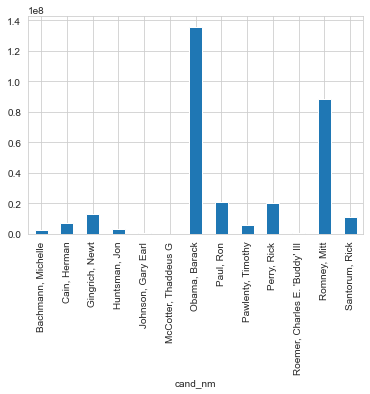

In [136]:
cand_amount.plot(kind='bar')

In [137]:
#Now the comparison is very easy to see. As we saw berfore, clearly Obama is the front-runner in donation amounts, which makes sense, since he is not competeing with any other democratic nominees. How about we just compare Democrat versus Republican donations?

<AxesSubplot:xlabel='Party'>

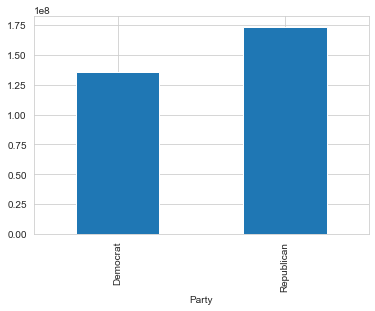

In [138]:
# Groupby party and then count donations
donor_df.groupby('Party')['contb_receipt_amt'].sum().plot(kind='bar')

In [145]:
# Use a pivot table to extract and organize the data by the donor occupation
occupation_df = donor_df.pivot_table('contb_receipt_amt',
                                index='contbr_occupation',
                                columns='Party', aggfunc='sum')

In [146]:
occupation_df.head()

Party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,NaN
AREA VICE PRESIDENT,250.0,NaN
RESEARCH ASSOCIATE,100.0,NaN
TEACHER,500.0,NaN
THERAPIST,3900.0,NaN


In [147]:
occupation_df.tail()

Party,Democrat,Republican
contbr_occupation,,
ZOOKEEPER,35.0,NaN
ZOOLOGIST,400.0,NaN
ZOOLOGY EDUCATION,25.0,NaN
\NONE\,NaN,250.0
~,NaN,75.0


In [152]:
occupation_df.shape

(45067, 2)

In [153]:
# Set a cut off point at 1 milllion dollars of sum contributions
occupation_df = occupation_df[occupation_df.sum(1) > 1000000]

In [154]:
occupation_df.shape

(31, 2)

<AxesSubplot:ylabel='contbr_occupation'>

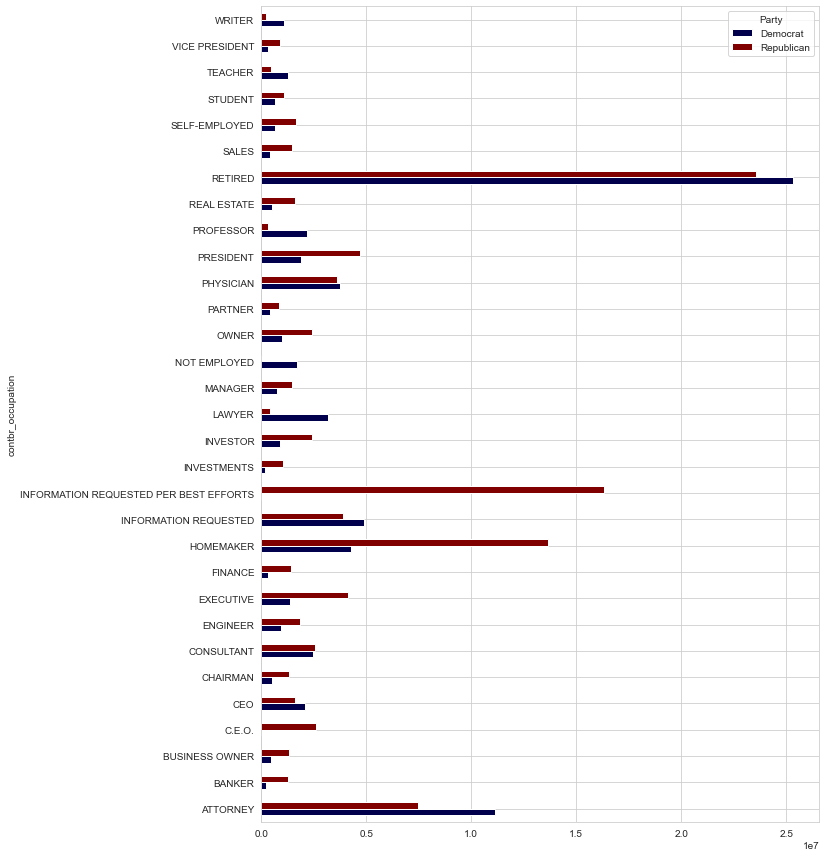

In [160]:
occupation_df.plot(kind='barh', figsize=(10,15), cmap='seismic')

In [161]:
# Drop the unavailble occupations
occupation_df.drop(['INFORMATION REQUESTED PER BEST EFFORTS','INFORMATION REQUESTED'],axis=0,inplace=True)

In [162]:
# Set new ceo row as sum of the current two
occupation_df.loc['CEO'] = occupation_df.loc['CEO'] + occupation_df.loc['C.E.O.']
# Drop CEO
occupation_df.drop('C.E.O.',inplace=True)

<AxesSubplot:ylabel='contbr_occupation'>

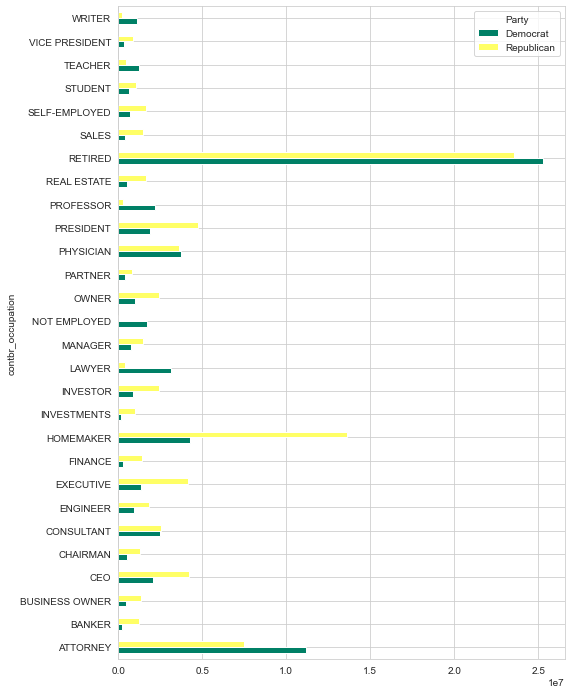

In [165]:
occupation_df.plot(kind='barh',figsize=(8,12),cmap='summer')

In [166]:
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,Party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
